Train data:
      x        y1         y2         y3         y4
0 -20.0  0.052658  20.164574 -8794.8430  899.70300
1 -19.9 -0.326488  20.199387 -8667.6455  893.20660
2 -19.8  0.073250  19.934326 -8541.1090  887.65985
3 -19.7 -0.244405  20.028587 -8416.3770  881.76850
4 -19.6 -0.405374  19.745829 -8292.8440  874.97230

Test data:
      x            y
0  -5.0   224.968630
1 -14.1 -3194.459500
2  12.1    -1.342644
3 -18.1 -1505.915800
4   9.4     0.775689

Ideal data:
      x        y1        y2        y3        y4        y5        y6        y7  \
0 -20.0 -0.912945  0.408082  9.087055  5.408082 -9.087055  0.912945 -0.839071   
1 -19.9 -0.867644  0.497186  9.132356  5.497186 -9.132356  0.867644 -0.865213   
2 -19.8 -0.813674  0.581322  9.186326  5.581322 -9.186326  0.813674 -0.889191   
3 -19.7 -0.751573  0.659649  9.248426  5.659649 -9.248426  0.751573 -0.910947   
4 -19.6 -0.681964  0.731386  9.318036  5.731386 -9.318036  0.681964 -0.930426   

         y8        y9  ...        y41       

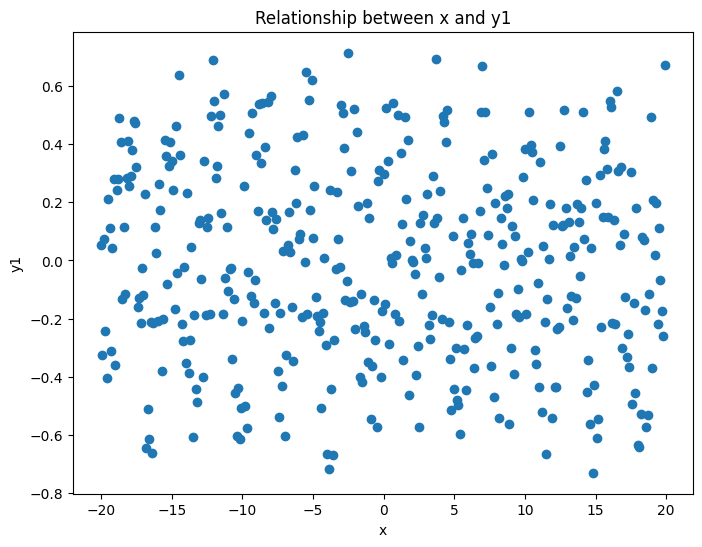

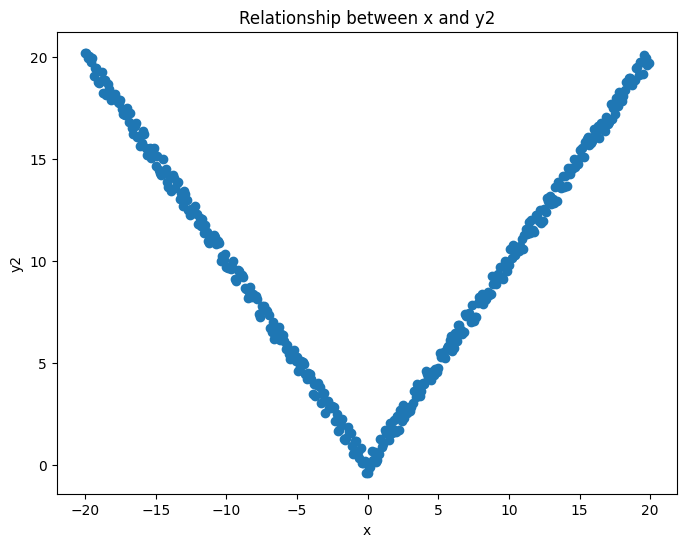

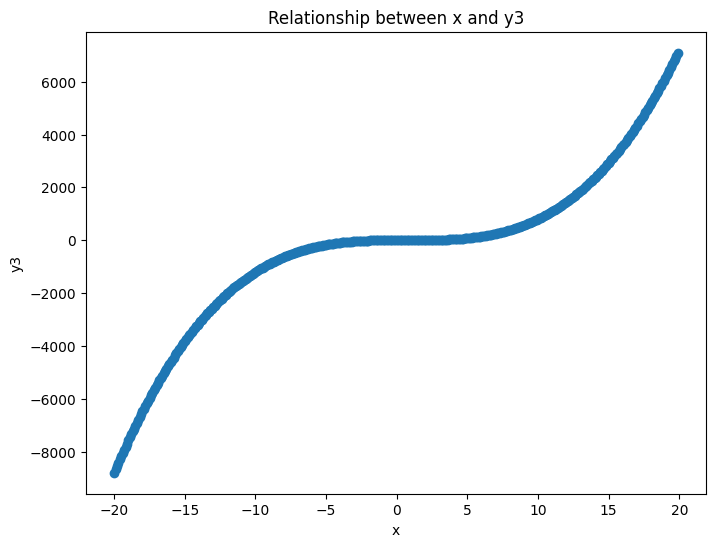

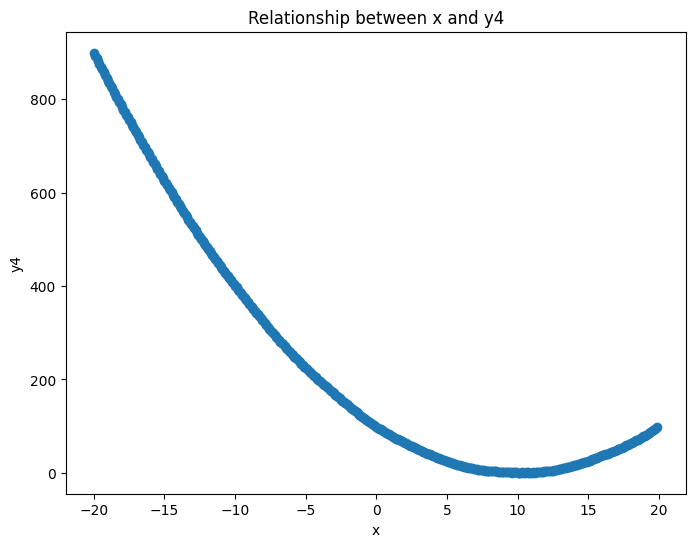

Validation Mean Squared Error for Linear Regression:  448778.37454525044
Validation Mean Squared Error for Random Forest Regression:  557.8277014709606


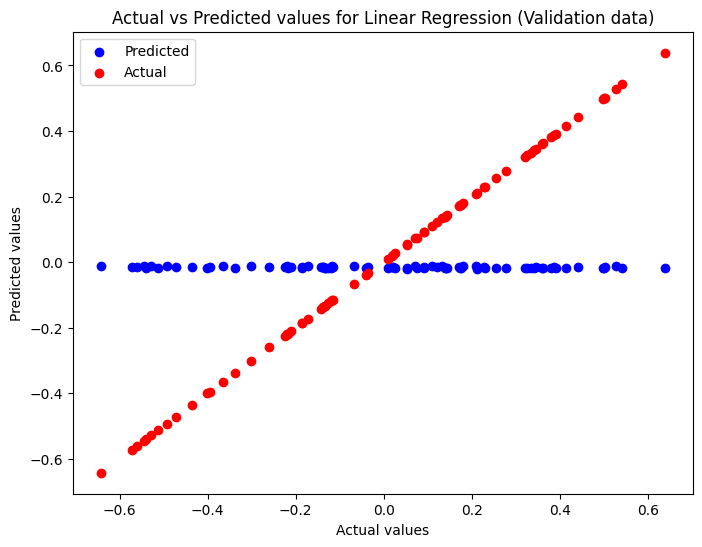

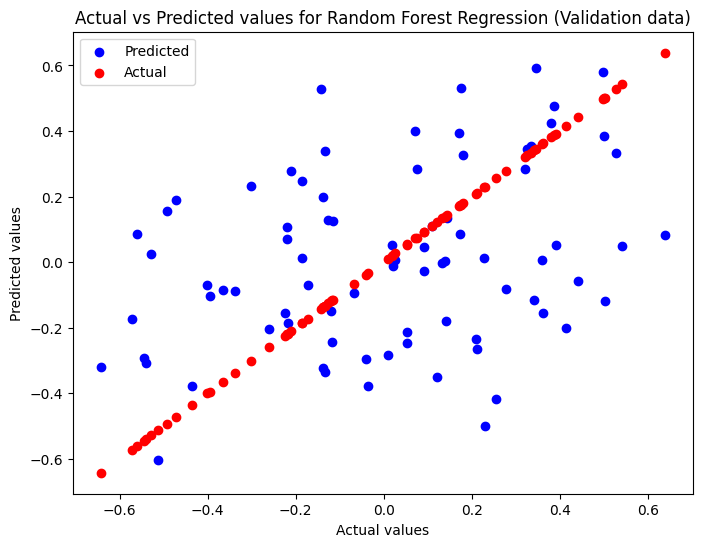

Mean Squared Error for Linear Regression with Ideal values:  1808217.1982268072
Mean Squared Error for Random Forest Regression with Ideal values:  2229217.523667436


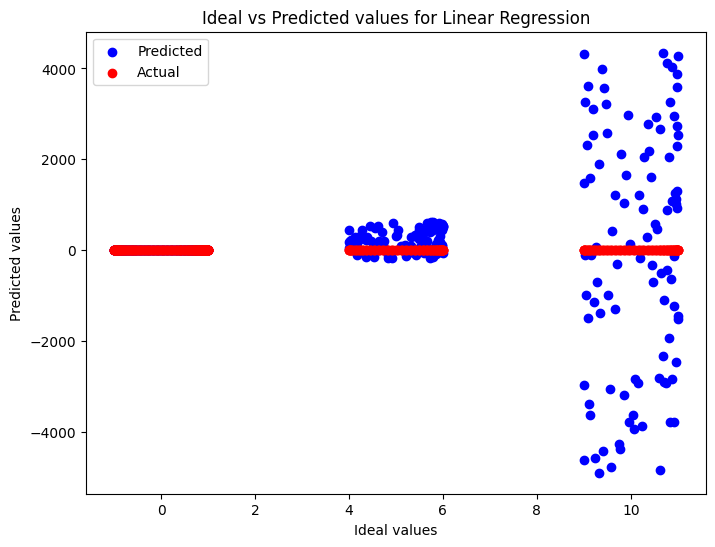

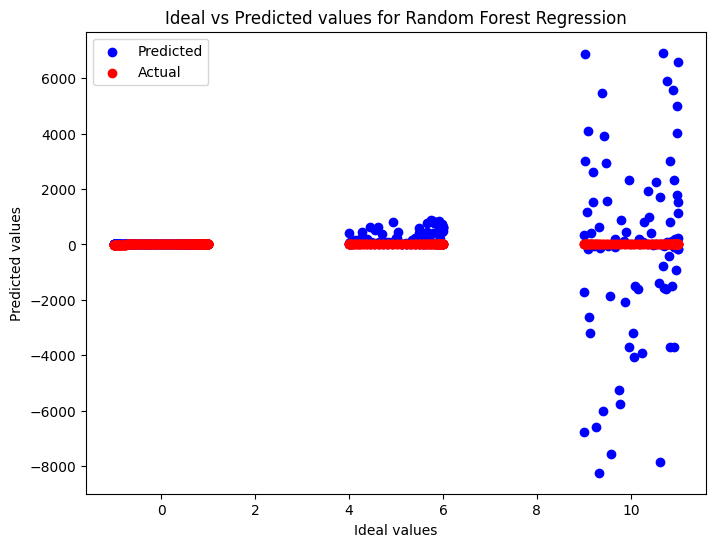

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
ideal = pd.read_csv("ideal.csv")

print("Train data:")
print(train.head())
print("\nTest data:")
print(test.head())
print("\nIdeal data:")
print(ideal.head())

# Plot relationship between X and each Y value separately
y_columns = ['y1', 'y2', 'y3', 'y4']
for y_col in y_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(train['x'], train[y_col])
    plt.xlabel('x')
    plt.ylabel(y_col)
    plt.title(f'Relationship between x and {y_col}')
    plt.show()

# Split the data into features (X) and targets (y)
X = train[['x']]
y = train[['y1', 'y2', 'y3', 'y4']]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
linear_model = LinearRegression()

# Train the linear regression model
linear_model.fit(X_train, y_train)

# Make predictions using the linear regression model
y_pred_linear = linear_model.predict(X_val)

# Compute the mean squared error for linear regression
mse_linear = mean_squared_error(y_val, y_pred_linear)
print("Validation Mean Squared Error for Linear Regression: ", mse_linear)

# Initialize the random forest regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the random forest regressor model
rf_model.fit(X_train, y_train)

# Make predictions using the random forest regressor model
y_pred_rf = rf_model.predict(X_val)

# Compute the mean squared error for random forest regressor
mse_rf = mean_squared_error(y_val, y_pred_rf)
print("Validation Mean Squared Error for Random Forest Regression: ", mse_rf)

# Make predictions on the test data using both models
y_test_pred_linear = linear_model.predict(test[['x']])
y_test_pred_rf = rf_model.predict(test[['x']])

# Plot Actual vs Predicted values for Linear Regression on Validation data
plt.figure(figsize=(8, 6))
plt.scatter(y_val['y1'], y_pred_linear[:, 0], color='blue', label='Predicted')
plt.scatter(y_val['y1'], y_val['y1'], color='red', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values for Linear Regression (Validation data)')
plt.legend()
plt.show()

# Plot Actual vs Predicted values for Random Forest Regression on Validation data
plt.figure(figsize=(8, 6))
plt.scatter(y_val['y1'], y_pred_rf[:, 0], color='blue', label='Predicted')
plt.scatter(y_val['y1'], y_val['y1'], color='red', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values for Random Forest Regression (Validation data)')
plt.legend()
plt.show()

# Get the corresponding ideal values for the test data
ideal_values = ideal[['y1', 'y2', 'y3', 'y4']].iloc[:len(test)]

# Calculate the mean squared error between predictions and ideal values
mse_linear_ideal = mean_squared_error(ideal_values, y_test_pred_linear)
mse_rf_ideal = mean_squared_error(ideal_values, y_test_pred_rf)

print("Mean Squared Error for Linear Regression with Ideal values: ", mse_linear_ideal)
print("Mean Squared Error for Random Forest Regression with Ideal values: ", mse_rf_ideal)

# Plot Ideal vs Predicted values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(ideal_values, y_test_pred_linear, color='blue', label='Predicted')
plt.scatter(ideal_values, ideal_values, color='red', label='Actual')
plt.xlabel('Ideal values')
plt.ylabel('Predicted values')
plt.title('Ideal vs Predicted values for Linear Regression')
plt.legend()
plt.show()

# Plot Ideal vs Predicted values for Random Forest Regression
plt.figure(figsize=(8, 6))
plt.scatter(ideal_values, y_test_pred_rf, color='blue', label='Predicted')
plt.scatter(ideal_values, ideal_values, color='red', label='Actual')
plt.xlabel('Ideal values')
plt.ylabel('Predicted values')
plt.title('Ideal vs Predicted values for Random Forest Regression')
plt.legend()
plt.show()
